person nr. 1
person nr. 4
person nr. 7
person nr. 10
person nr. 13
person nr. 16
person nr. 19
person nr. 2
person nr. 8
person nr. 11
person nr. 17
person nr. 20
person nr. 24
person nr. 25
person nr. 3
person nr. 6
person nr. 9
person nr. 12
person nr. 15
person nr. 18
person nr. 21


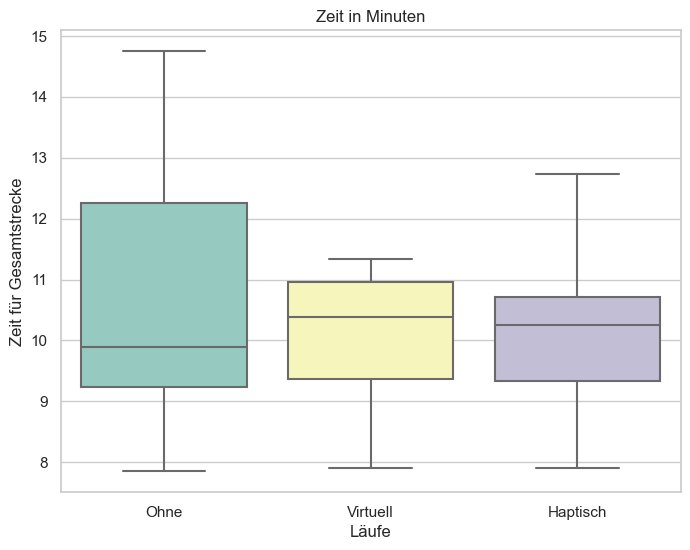

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

idsReference = [1,4,7,10,13,16,19] # broken runs 22
idsVirtual = [2,8,11,17,20,24,25] #broken runs 5,14
idsHaptic = [3,6,9,12,15,18,21] #broken runs 23,26

def visualizeTotalTime(data):
    sns.set(style="whitegrid")
    plt.figure(figsize=(8, 6))  # Größe des Plots festlegen

    sns.boxplot(data=data, palette="Set3")  # "Set3" ist ein Farbschema
    plt.xticks([0, 1, 2], ['Ohne', 'Virtuell', 'Haptisch'])  # Beschriftungen für die Boxplots
    plt.xlabel("Läufe")
    plt.ylabel("Zeit für Gesamtstrecke")
    plt.title("Zeit in Minuten")
    plt.savefig('../Visualisierungen/gesamtzeiten.png', dpi=300)
    plt.show()

def analyseTimeToComplete(ids):
    timestocomplete = []
    for n in ids:
        print('person nr. ' + str(n))
        filepath = '../Versuchsdaten_vorverarbeitet/' + str(n) + '/dynamicrun.csv'
        
        if not os.path.isfile(filepath):
            print('No data to read nr. ' + str(n))
            continue
        df = pd.read_csv(filepath, sep=';')
        starttime = df['TimeStamp_Unix'].min()
        endtime = df['TimeStamp_Unix'].max()
        
        timetocomplete = endtime - starttime
        timestocomplete.append(timetocomplete / 60)
    return timestocomplete

timesref = analyseTimeToComplete(idsReference)
timesvirt = analyseTimeToComplete(idsVirtual)
timeshapt = analyseTimeToComplete(idsHaptic)

timedf = pd.DataFrame({"referenz":timesref,
    "virtuell":timesvirt,
    "haptisch":timeshapt})

visualizeTotalTime(timedf)

[81, 50, 53, 55, 78, 68, 45]
[58, 51, 84, 48, 72, 76, 72]
[65, 67, 57, 78, 59, 49, 64]


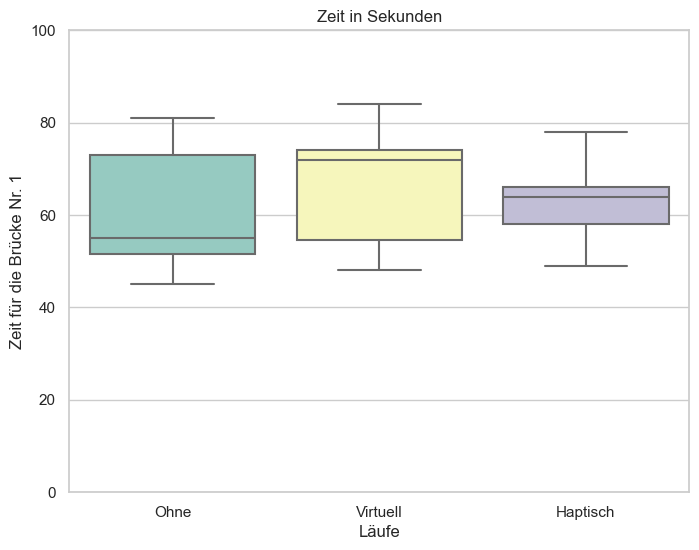

[96, 63, 63, 72, 87, 80, 56]
[81, 70, 85, 60, 84, 72, 79]
[84, 96, 72, 83, 73, 59, 76]


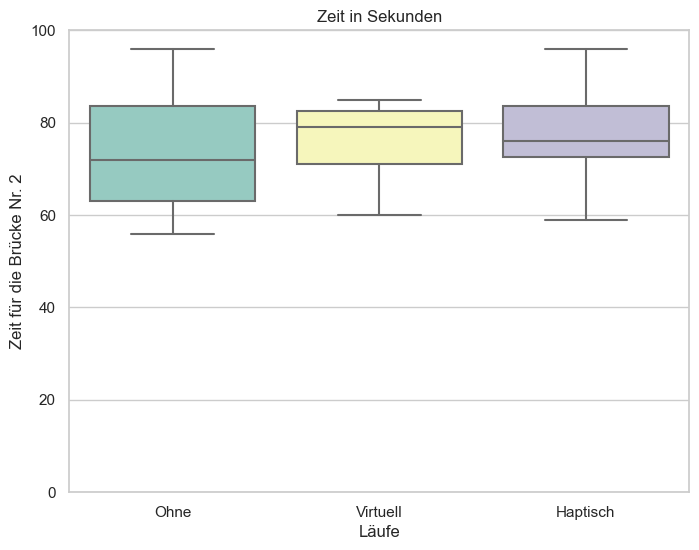

[18, 18, 14, 15, 17, 19, 12]
[14, 44, 28, 16, 15, 17, nan]
[15, 17, 16, 18, 15, 29, 14]


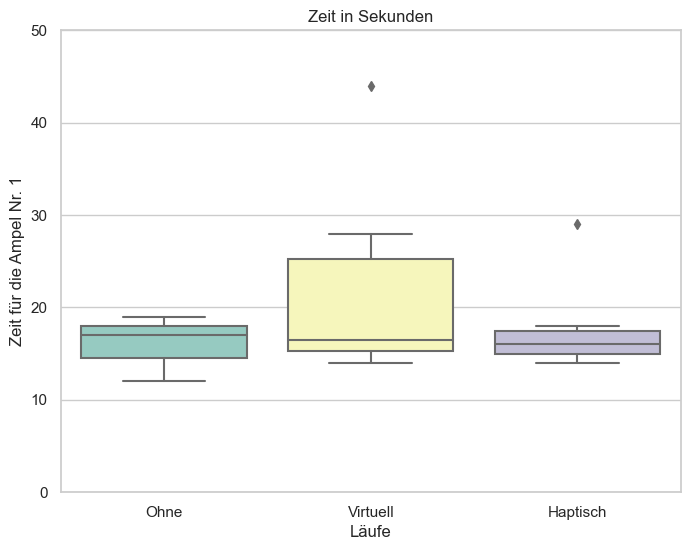

[20, 13, 13, 25, 21, 18, 13]
[13, 13, 19, 11, 16, 15, 33]
[15, 16, 13, 17, 16, 19, 28]


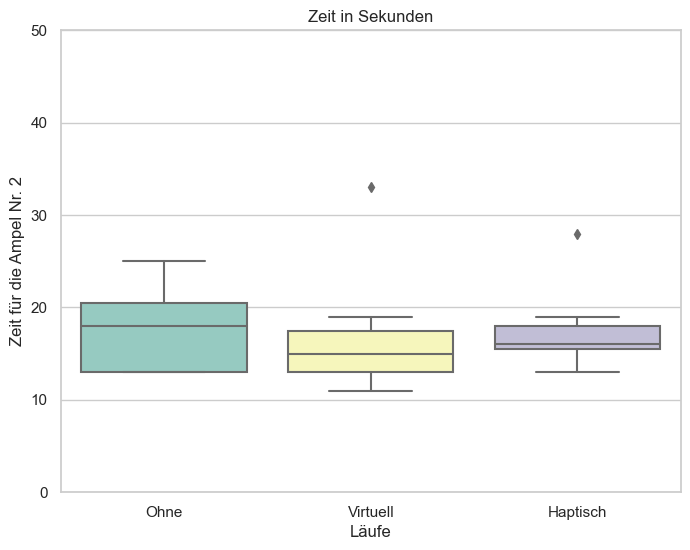

In [15]:
import numpy as np

def visualizeTime(data, nr, name, name2, limit):
    sns.set(style="whitegrid")
    plt.figure(figsize=(8, 6))  # Größe des Plots festlegen

    ax = sns.boxplot(data=data, palette="Set3")  # "Set3" ist ein Farbschema
    ax.set_ylim(0,limit)
    plt.xticks([0, 1, 2], ['Ohne', 'Virtuell', 'Haptisch'])  # Beschriftungen für die Boxplots
    plt.xlabel("Läufe")
    plt.ylabel("Zeit für die " + name2 + " Nr. " + str(nr))
    plt.title("Zeit in Sekunden")
    plt.savefig('../Visualisierungen/zeiten_' + name + '_' + str(nr) + '.png', dpi=300)
    plt.show()

def analyseTime(ids, begin, end):
    timestocomplete = []
    for n in ids:
        #print('person nr. ' + str(n))
        filepath = '../Versuchsdaten_vorverarbeitet/' + str(n) + '/dynamicrun.csv'
        
        if not os.path.isfile(filepath):
            print('No data to read nr. ' + str(n))
            continue
        df = pd.read_csv(filepath, sep=';')
        
        startBridge_1_df = df.groupby([begin, end])
        for group_value, group_data in startBridge_1_df:
            if group_value == (True, False): #Begin of Bridge triggered, but end not
                starttime = group_data['TimeStamp_Unix'].min()
                endtime = group_data['TimeStamp_Unix'].max()
        
                timetocomplete = endtime - starttime
                timestocomplete.append(timetocomplete)
    return timestocomplete

timesref = analyseTime(idsReference, 'TriggerBeginBridge1_Status', 'TriggerEndBridge1_Status')
timesvirt = analyseTime(idsVirtual, 'TriggerBeginBridge1_Status', 'TriggerEndBridge1_Status')
timeshapt = analyseTime(idsHaptic, 'TriggerBeginBridge1_Status', 'TriggerEndBridge1_Status')

print(timesref)
print(timesvirt)
print(timeshapt)

timedf = pd.DataFrame({"referenz":timesref,
    "virtuell":timesvirt,
    "haptisch":timeshapt})

visualizeTime(timedf, 1, 'bruecke', 'Brücke', 100)

timesref = analyseTime(idsReference, 'TriggerBeginBridge2_Status', 'TriggerEndBridge2_Status')
timesvirt = analyseTime(idsVirtual, 'TriggerBeginBridge2_Status', 'TriggerEndBridge2_Status')
timeshapt = analyseTime(idsHaptic, 'TriggerBeginBridge2_Status', 'TriggerEndBridge2_Status')

print(timesref)
print(timesvirt)
print(timeshapt)


timedf = pd.DataFrame({"referenz":timesref,
    "virtuell":timesvirt,
    "haptisch":timeshapt})

visualizeTime(timedf, 2, 'bruecke', 'Brücke', 100)

timesref = analyseTime(idsReference, 'TriggerOverlapStreetCrossing1_Status', 'TriggerEndCrossing1_Status')
timesvirt = analyseTime(idsVirtual, 'TriggerOverlapStreetCrossing1_Status', 'TriggerEndCrossing1_Status')
timeshapt = analyseTime(idsHaptic, 'TriggerOverlapStreetCrossing1_Status', 'TriggerEndCrossing1_Status')

max_len = max(len(timesref), len(timesvirt), len(timeshapt))

timesref.extend([np.nan] * (max_len - len(timesref)))
timesvirt.extend([np.nan] * (max_len - len(timesvirt)))
timeshapt.extend([np.nan] * (max_len - len(timeshapt)))

print(timesref)
print(timesvirt)
print(timeshapt)

timedf = pd.DataFrame({"referenz":timesref,
    "virtuell":timesvirt,
    "haptisch":timeshapt})

visualizeTime(timedf, 1, 'crossing', 'Ampel', 50)

timesref = analyseTime(idsReference, 'TriggerOverlapStreetCrossing2_Status', 'TriggerEndCrossing2_Status')
timesvirt = analyseTime(idsVirtual, 'TriggerOverlapStreetCrossing2_Status', 'TriggerEndCrossing2_Status')
timeshapt = analyseTime(idsHaptic, 'TriggerOverlapStreetCrossing2_Status', 'TriggerEndCrossing2_Status')

print(timesref)
print(timesvirt)
print(timeshapt)

timedf = pd.DataFrame({"referenz":timesref,
    "virtuell":timesvirt,
    "haptisch":timeshapt})

visualizeTime(timedf, 2, 'crossing', 'Ampel', 50)